In [40]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# 파일 불러오기
all = pd.read_excel("../데이터자료/Join_data.xlsx", index_col = 0)    

# 컬럼 추출
# all2 = all[['DateTime', '종가_ex','1Y_전일비_irs', '2Y_전일비_irs', '3Y_전일비_irs',
#         '5Y_전일비_irs', '10Y_전일비_irs',  '1Y_전일비_crs', '2Y_전일비_crs','3Y_전일비_crs','5Y_전일비_crs','10Y_전일비_crs',
#         '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
#         'M1_스왑포인트']]            # [[]] 대괄호 2개 사용 -> 데이터 프레임형태로 나옴

all2 = all[['DateTime', '종가_ex','1Y_Mid_irs', '2Y_Mid_irs', '3Y_Mid_irs',
        '5Y_Mid_irs', '10Y_Mid_irs',  '1Y_Mid_crs', '2Y_Mid_crs','3Y_Mid_crs','5Y_Mid_crs','10Y_Mid_crs',
        '국고1년', '국고3년', '국고5년','국고10년', '통안364일', '통안2년', 'Mid_ndf',
        'M1_스왑포인트']]     
        
all2 = all2.set_index("DateTime")

all2['1Y_대비_irs'] = all2['1Y_Mid_irs']-all2['1Y_Mid_irs'].shift(1)
all2['2Y_대비_irs'] = all2['2Y_Mid_irs']-all2['2Y_Mid_irs'].shift(1)
all2['3Y_대비_irs'] = all2['3Y_Mid_irs']-all2['3Y_Mid_irs'].shift(1)
all2['5Y_대비_irs'] = all2['5Y_Mid_irs']-all2['5Y_Mid_irs'].shift(1)
all2['10Y_대비_irs'] = all2['10Y_Mid_irs']-all2['10Y_Mid_irs'].shift(1)
all2['1Y_대비_crs'] = all2['1Y_Mid_crs']-all2['1Y_Mid_crs'].shift(1)
all2['2Y_대비_crs'] = all2['2Y_Mid_crs']-all2['2Y_Mid_crs'].shift(1)
all2['3Y_대비_crs'] = all2['3Y_Mid_crs']-all2['3Y_Mid_crs'].shift(1)
all2['5Y_대비_crs'] = all2['5Y_Mid_crs']-all2['5Y_Mid_crs'].shift(1)
all2['10Y_대비_crs'] = all2['10Y_Mid_crs']-all2['10Y_Mid_crs'].shift(1)

all2['대비_국고1년'] = all2['국고1년']-all2['국고1년'].shift(1)
all2['대비_국고3년'] = all2['국고3년']-all2['국고3년'].shift(1)
all2['대비_국고5년'] = all2['국고5년']-all2['국고5년'].shift(1)
all2['대비_국고10년'] = all2['국고10년']-all2['국고10년'].shift(1)
all2['대비_통안1년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_통안2년'] = all2['통안364일']-all2['통안364일'].shift(1)
all2['대비_ndf'] = all2['Mid_ndf']-all2['Mid_ndf'].shift(1)
all2['스왑포인트_1월물'] = all2["M1_스왑포인트"]/100 
all2['전일종가_ex'] = all2['종가_ex'].shift(1)

# all2.rename({"1Y_전일비_irs" : "1Y_대비_irs", "2Y_전일비_irs" : "2Y_대비_irs", "3Y_전일비_irs" : "3Y_대비_irs", "5Y_전일비_irs" : "5Y_대비_irs", "10Y_전일비_irs" : "10Y_대비_irs",
#             "1Y_전일비_crs" : "1Y_대비_crs", "2Y_전일비_crs" : "2Y_대비_crs", "3Y_전일비_crs" : "3Y_대비_crs", "5Y_전일비_crs" : "5Y_대비_crs", "10Y_전일비_crs" : "10Y_대비_crs"}, axis=1, inplace=True)

all2 = all2.dropna()

# 필요 칼럼만 남기기
df = all2.copy()
df = all2[["종가_ex", 
            '1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
            '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
            "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
            "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"

# DateTime을 인덱스로 바꿔주기
df

,종가_ex,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,,
2012-08-02,1131.7,-0.03,-0.05,-0.05,-0.05,-0.05,-0.01,0.030,0.04,0.04,0.04,-0.03,-0.04,-0.04,-0.04,-0.03,-0.03,1.75,2.50,1126.5
2012-08-03,1134.8,-0.03,-0.03,-0.03,-0.03,-0.02,-0.01,-0.015,-0.02,-0.08,-0.15,-0.02,-0.02,-0.07,-0.07,-0.02,-0.02,4.00,2.40,1131.7
2012-08-06,1129.0,0.02,0.02,0.02,0.02,0.01,0.00,-0.025,-0.03,-0.04,-0.04,0.01,0.01,0.00,0.00,0.01,0.01,-9.50,2.40,1134.8
2012-08-07,1128.8,0.01,0.00,0.00,0.01,0.02,0.02,0.015,0.00,-0.07,-0.08,-0.01,0.00,0.00,0.00,-0.01,-0.01,0.50,2.50,1129.0
2012-08-08,1128.3,0.01,0.02,0.02,0.02,0.03,0.01,0.000,0.00,-0.02,-0.04,-0.01,-0.02,-0.02,-0.02,-0.01,-0.01,1.25,2.40,1128.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,1313.7,-0.04,-0.08,-0.07,-0.09,-0.11,-0.08,-0.090,-0.07,-0.11,-0.11,-0.02,-0.06,-0.07,-0.09,-0.01,-0.01,3.35,-0.60,1313.0
2022-07-26,1307.6,-0.01,-0.02,-0.03,-0.03,-0.03,0.01,-0.030,-0.03,-0.02,-0.02,0.01,-0.03,-0.02,-0.03,0.01,0.01,1.15,-0.70,1313.7
2022-07-27,1313.3,-0.01,-0.05,-0.06,-0.06,-0.06,0.01,-0.010,-0.01,-0.01,-0.01,0.00,-0.03,-0.05,-0.06,0.02,0.02,-0.50,-0.55,1307.6


In [41]:
from sklearn.preprocessing import StandardScaler

x = df[['1Y_대비_irs', '2Y_대비_irs', '3Y_대비_irs', '5Y_대비_irs', '10Y_대비_irs', 
          '1Y_대비_crs', '2Y_대비_crs', '3Y_대비_crs', '5Y_대비_crs', '10Y_대비_crs', 
          "대비_국고1년", "대비_국고3년", "대비_국고5년", "대비_국고10년", "대비_통안1년", "대비_통안2년",
           "대비_ndf", "스왑포인트_1월물", "전일종가_ex"]] # , "전일종가_ex"
y = df[["종가_ex"]]

x.feature = x.columns 


# StandardScaler객체 생성
scaler = StandardScaler()

# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.
scaler.fit(x)
data_scaled = scaler.transform(x)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
x_scaled = pd.DataFrame(data = data_scaled, columns=x.feature)
x_scaled.index = y.index # 인덱스가 달라서 똑같이 설정
x_scaled


,1Y_대비_irs,2Y_대비_irs,3Y_대비_irs,5Y_대비_irs,10Y_대비_irs,1Y_대비_crs,2Y_대비_crs,3Y_대비_crs,5Y_대비_crs,10Y_대비_crs,대비_국고1년,대비_국고3년,대비_국고5년,대비_국고10년,대비_통안1년,대비_통안2년,대비_ndf,스왑포인트_1월물,전일종가_ex
DateTime,,,,,,,,,,,,,,,,,,,
2012-08-02,-0.847862,-1.217081,-0.935854,-1.045679,-1.009126,-0.205655,0.707360,0.905480,0.926463,0.826282,-1.698057,-0.646622,-1.079749,-1.027569,-0.325920,-0.325920,0.293727,1.909409,-0.149841
2012-08-03,-0.847862,-0.731532,-0.562378,-0.628002,-0.403231,-0.205655,-0.364505,-0.463176,-1.872849,-3.115790,-1.132651,-0.323869,-1.890219,-1.798403,-0.217574,-0.217574,0.686290,1.818881,-0.056232
2012-08-06,0.560374,0.482340,0.371312,0.416191,0.202663,-0.003373,-0.602697,-0.691285,-0.939745,-0.833538,0.563566,0.160261,0.000879,0.000209,0.107465,0.107465,-1.669093,1.818881,-0.000426
2012-08-07,0.278727,-0.003209,-0.002164,0.207352,0.404628,0.401191,0.350072,-0.006957,-1.639573,-1.663448,-0.567245,-0.001116,0.000879,0.000209,-0.109228,-0.109228,0.075636,1.909409,-0.104837
2012-08-08,0.278727,0.482340,0.371312,0.416191,0.606592,0.198909,-0.007216,-0.006957,-0.473193,-0.833538,-0.567245,-0.323869,-0.539435,-0.513680,-0.109228,-0.109228,0.206490,1.818881,-0.108437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-25,-1.129510,-1.945404,-1.309330,-1.881032,-2.220914,-1.621628,-2.150945,-1.603722,-2.572677,-2.285880,-1.132651,-0.969375,-1.890219,-2.312292,-0.109228,-0.109228,0.572883,-0.896960,3.207485
2022-07-26,-0.284568,-0.488757,-0.562378,-0.628002,-0.605196,0.198909,-0.721793,-0.691285,-0.473193,-0.418583,0.563566,-0.485246,-0.539435,-0.770625,0.107465,0.107465,0.189043,-0.987488,3.220086
2022-07-27,-0.284568,-1.217081,-1.122592,-1.254517,-1.211091,0.198909,-0.245409,-0.235067,-0.239917,-0.211106,-0.001839,-0.485246,-1.349905,-1.541458,0.215812,0.215812,-0.098837,-0.851696,3.110275


<AxesSubplot:>

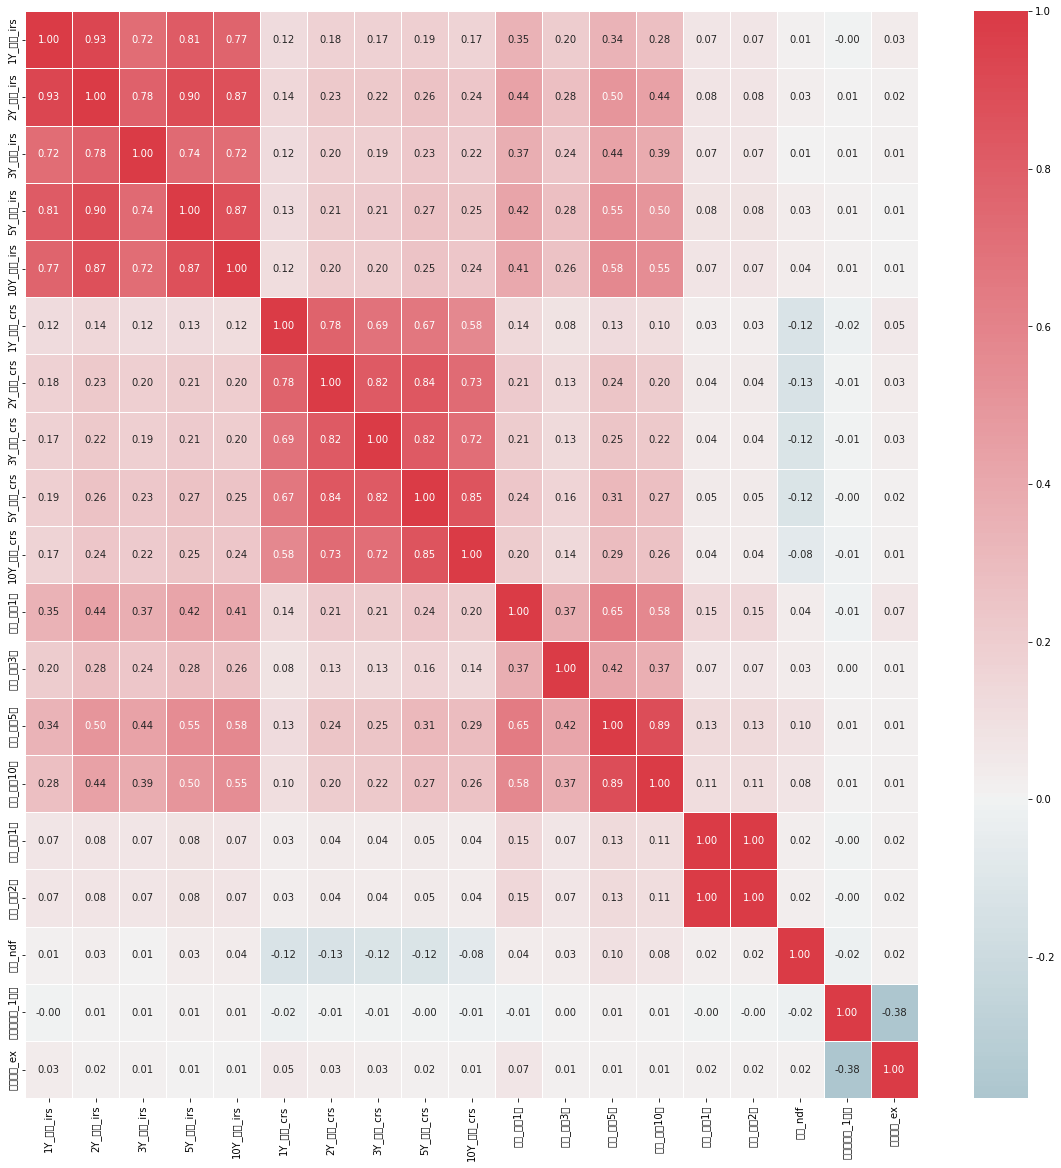

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [43]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.731e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:56:13   Log-Likelihood:                -7400.0
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2440   BIC:                         1.495e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
1Y_대비_irs      0.1542      0.313      0.492      0.623      -0.460       0.769
2Y_대비_irs      0.4668      0.438      1.065      0.287      -0.393       1.327
3Y_대비_irs      0.0980      0.162      0.605      0.546      -0.220       0.416
5Y_대비_irs     -0.3034      0.253     -1.201      0.230      -0.799       0.192
10Y_대비_irs    -0.4629      0.241     -1.924      0.055      -0.935       0.009
1Y_대비_crs     -1.0260      0.162     -6.344      0.000      -1.343      -0.709
2Y_대비_crs     -0.0402      0.228     -0.176      0.860      -0.487       0.407
3Y_대비_crs     -0.3766      0.194     -1.937      0.053      -0.758       0.005
5Y_대비_crs      0.0670      0.257      0.260      0.795      -0.438       0.571
10Y_대비_crs     0.0184      0.192      0.096      0.924      -0.357       0.394
대비_국고1년        0.1762      0.137      1.288      0.198      -0.092       0.444
대비_국고3년       -0.2636      0.111     -2.371      0.018      -0.482      -0.046
대비_국고5년        0.5478      0.249      2.204      0.028       0.060       1.035
대비_국고10년      -0.1294      0.223     -0.580      0.562      -0.567       0.309
대비_통안1년       -0.0203      0.050     -0.404      0.686      -0.119       0.078
대비_통안2년       -0.0203      0.050     -0.404      0.686      -0.119       0.078
대비_ndf         2.3961      0.101     23.616      0.000       2.197       2.595
스왑포인트_1월물     -0.1094      0.107     -1.019      0.308      -0.320       0.101
전일종가_ex       55.3087      0.108    512.225      0.000      55.097      55.520
==============================================================================
Omnibus:                       49.882   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.045
Skew:                           0.042   Prob(JB):                     4.21e-23
Kurtosis:                       3.999   Cond. No.                     4.65e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.13e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled

def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     9.960025   1Y_대비_irs
1    19.491060   2Y_대비_irs
2     2.663770   3Y_대비_irs
3     6.469416   5Y_대비_irs
4     5.871072  10Y_대비_irs
5     2.652126   1Y_대비_crs
6     5.273563   2Y_대비_crs
7     3.830898   3Y_대비_crs
8     6.709899   5Y_대비_crs
9     3.722334  10Y_대비_crs
10    1.897395     대비_국고1년
11    1.253008     대비_국고3년
12    6.264447     대비_국고5년
13    5.056907    대비_국고10년
14         inf     대비_통안1년
15         inf     대비_통안2년
16    1.043627      대비_ndf
17    1.169229   스왑포인트_1월물
18    1.182022     전일종가_ex


In [45]:
x_scaled.drop(['2Y_대비_irs','대비_통안2년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

    VIF_Factor     Feature
0     3.928416   1Y_대비_irs
1     2.552766   3Y_대비_irs
2     5.803599   5Y_대비_irs
3     5.218339  10Y_대비_irs
4     2.649311   1Y_대비_crs
5     5.262188   2Y_대비_crs
6     3.828372   3Y_대비_crs
7     6.704333   5Y_대비_crs
8     3.722194  10Y_대비_crs
9     1.885391     대비_국고1년
10    1.246909     대비_국고3년
11    6.175629     대비_국고5년
12    5.043017    대비_국고10년
13    1.025052     대비_통안1년
14    1.043373      대비_ndf
15    1.169180   스왑포인트_1월물
16    1.181220     전일종가_ex


In [46]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 1.832e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:56:13   Log-Likelihood:                -7400.6
No. Observations:                2459   AIC:                         1.484e+04
Df Residuals:                    2441   BIC:                         1.494e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.089
1Y_대비_irs      0.4139      0.197      2.102      0.036       0.028       0.800
3Y_대비_irs      0.1332      0.159      0.840      0.401      -0.178       0.444
5Y_대비_irs     -0.2171      0.239     -0.907      0.364      -0.686       0.252
10Y_대비_irs    -0.3775      0.227     -1.664      0.096      -0.822       0.067
1Y_대비_crs     -1.0316      0.162     -6.382      0.000      -1.349      -0.715
2Y_대비_crs     -0.0289      0.228     -0.127      0.899      -0.476       0.418
3Y_대비_crs     -0.3819      0.194     -1.965      0.049      -0.763      -0.001
5Y_대비_crs      0.0748      0.257      0.291      0.771      -0.429       0.579
10Y_대비_crs     0.0196      0.192      0.102      0.918      -0.356       0.395
대비_국고1년        0.1877      0.136      1.377      0.169      -0.080       0.455
대비_국고3년       -0.2553      0.111     -2.302      0.021      -0.473      -0.038
대비_국고5년        0.5793      0.247      2.347      0.019       0.095       1.063
대비_국고10년      -0.1419      0.223     -0.636      0.525      -0.579       0.295
대비_통안1년       -0.0426      0.101     -0.424      0.672      -0.240       0.155
대비_ndf         2.3978      0.101     23.635      0.000       2.199       2.597
스왑포인트_1월물     -0.1087      0.107     -1.012      0.312      -0.319       0.102
전일종가_ex       55.3057      0.108    512.358      0.000      55.094      55.517
==============================================================================
Omnibus:                       50.342   Durbin-Watson:                   2.645
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.105
Skew:                           0.047   Prob(JB):                     2.48e-23
Kurtosis:                       4.004   Cond. No.                         7.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
x_scaled.drop(['3Y_대비_irs', '5Y_대비_crs', '2Y_대비_crs','5Y_대비_crs','스왑포인트_1월물','대비_통안1년',
               '10Y_대비_crs','대비_국고1년','대비_국고10년'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor     Feature
0    3.403550   1Y_대비_irs
1    5.652774   5Y_대비_irs
2    4.922637  10Y_대비_irs
3    1.941847   1Y_대비_crs
4    2.045578   3Y_대비_crs
5    1.224544     대비_국고3년
6    1.934104     대비_국고5년
7    1.035477      대비_ndf
8    1.005510     전일종가_ex


In [48]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.466e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:56:13   Log-Likelihood:                -7402.8
No. Observations:                2459   AIC:                         1.483e+04
Df Residuals:                    2449   BIC:                         1.488e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.088
1Y_대비_irs      0.5127      0.183      2.800      0.005       0.154       0.872
5Y_대비_irs     -0.1790      0.236     -0.759      0.448      -0.642       0.284
10Y_대비_irs    -0.3981      0.220     -1.808      0.071      -0.830       0.034
1Y_대비_crs     -1.0195      0.138     -7.372      0.000      -1.291      -0.748
3Y_대비_crs     -0.3317      0.142     -2.337      0.020      -0.610      -0.053
대비_국고3년       -0.2327      0.110     -2.119      0.034      -0.448      -0.017
대비_국고5년        0.5823      0.138      4.219      0.000       0.312       0.853
대비_ndf         2.3938      0.101     23.703      0.000       2.196       2.592
전일종가_ex       55.3542      0.100    556.223      0.000      55.159      55.549
==============================================================================
Omnibus:                       47.985   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.076
Skew:                           0.031   Prob(JB):                     5.05e-22
Kurtosis:                       3.976   Cond. No.                         5.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
x_scaled.drop(['5Y_대비_irs'], axis=1, inplace=True)

from statsmodels.stats.outliers_influence import variance_inflation_factor
X_train = x_scaled
def feature_engineering_XbyVIF(X_train):
    vif = pd.DataFrame()
    vif["VIF_Factor"] = [variance_inflation_factor(X_train.values,i)
                         for i in range(X_train.shape[1])]
    vif["Feature"] = X_train.columns
    return vif
vif = feature_engineering_XbyVIF(X_train)
print(vif)

   VIF_Factor     Feature
0    2.611903   1Y_대비_irs
1    3.440737  10Y_대비_irs
2    1.940550   1Y_대비_crs
3    2.041085   3Y_대비_crs
4    1.223367     대비_국고3년
5    1.860342     대비_국고5년
6    1.035454      대비_ndf
7    1.005130     전일종가_ex


In [50]:
import statsmodels.api as sm

feature_add = sm.add_constant(x_scaled, has_constant='add')

# sm OLS 적합
model = sm.OLS(y , feature_add)
fitted_model = model.fit()

# summary 함수통해 결과출력
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  종가_ex   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.900e+04
Date:                Thu, 13 Oct 2022   Prob (F-statistic):               0.00
Time:                        22:56:14   Log-Likelihood:                -7403.1
No. Observations:                2459   AIC:                         1.482e+04
Df Residuals:                    2450   BIC:                         1.488e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1134.8939      0.099   1.14e+04      0.000    1134.699    1135.088
1Y_대비_irs      0.4457      0.160      2.779      0.005       0.131       0.760
10Y_대비_irs    -0.4898      0.184     -2.661      0.008      -0.851      -0.129
1Y_대비_crs     -1.0168      0.138     -7.356      0.000      -1.288      -0.746
3Y_대비_crs     -0.3368      0.142     -2.376      0.018      -0.615      -0.059
대비_국고3년       -0.2353      0.110     -2.143      0.032      -0.450      -0.020
대비_국고5년        0.5618      0.135      4.151      0.000       0.296       0.827
대비_ndf         2.3934      0.101     23.702      0.000       2.195       2.591
전일종가_ex       55.3557      0.099    556.391      0.000      55.161      55.551
==============================================================================
Omnibus:                       47.506   Durbin-Watson:                   2.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.761
Skew:                           0.029   Prob(JB):                     9.74e-22
Kurtosis:                       3.970   Cond. No.                         3.84
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:>

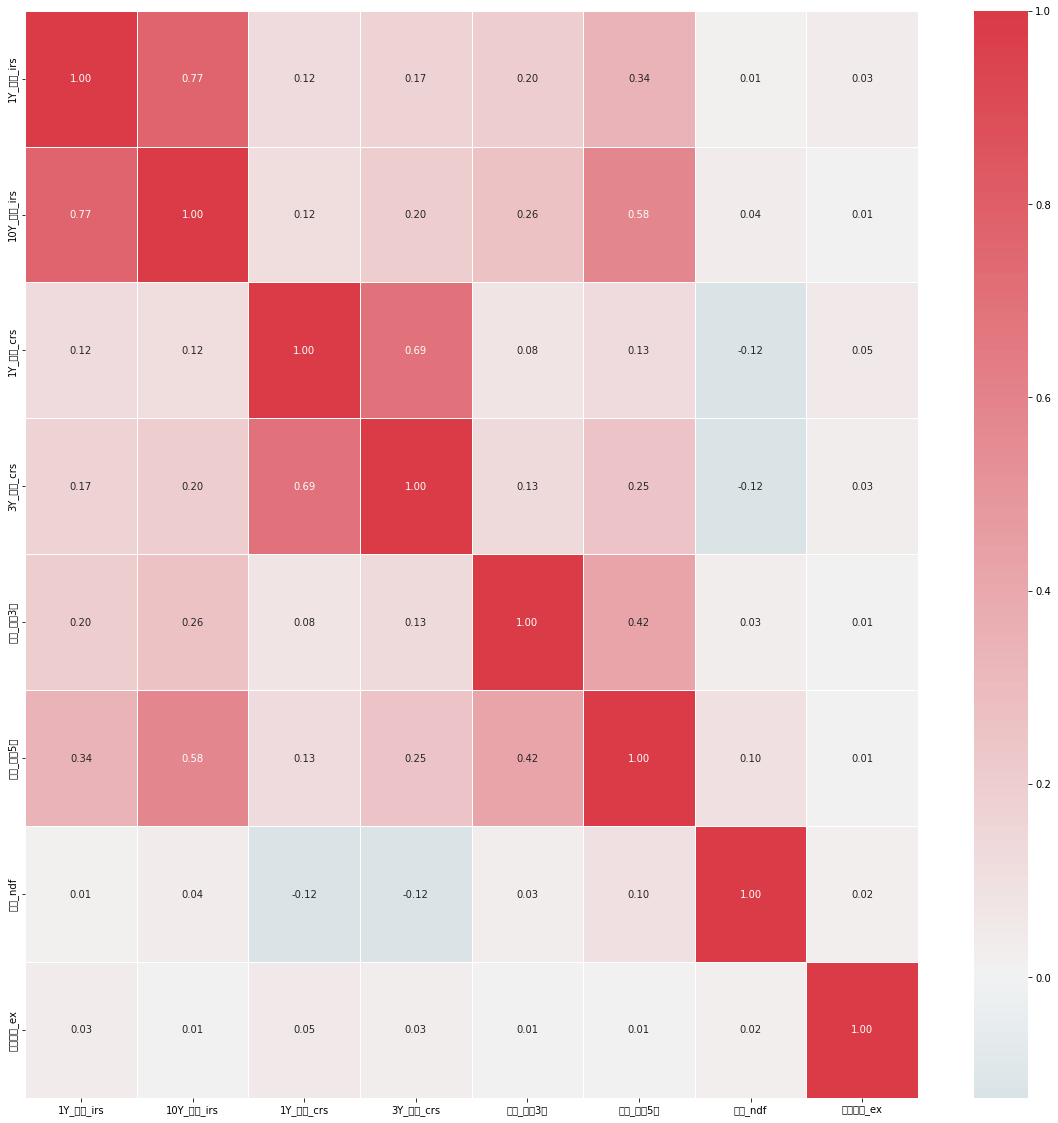

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns   
import scipy as sp  
from matplotlib import rc 
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(20,20))

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(data = x_scaled.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap=cmap, center=0)

In [52]:
# x_scaled.drop(['대비_국고3년'], axis=1, inplace=True)

# import statsmodels.api as sm

# feature_add = sm.add_constant(x_scaled, has_constant='add')

# # sm OLS 적합
# model = sm.OLS(y , feature_add)
# fitted_model = model.fit()

# # summary 함수통해 결과출력
# fitted_model.summary()

In [53]:
# x_scaled.drop(['3Y_대비_crs'], axis=1, inplace=True)

# import statsmodels.api as sm

# feature_add = sm.add_constant(x_scaled, has_constant='add')

# # sm OLS 적합
# model = sm.OLS(y , feature_add)
# fitted_model = model.fit()

# # summary 함수통해 결과출력
# fitted_model.summary()

In [54]:
import numpy as np 
# import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=10)
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

y_pred = mlr.predict(x_test)

from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test,y_pred)

print('MSE : {0:}, RMSE : {1: .3f}, MAE:{1: .3f}'.format(mse, rmse, mae))
print('Variance score : {0: .3f}'.format(r2_score(y_test, y_pred)))


MSE : 23.911004773400204, RMSE :  4.890, MAE: 4.890
Variance score :  0.992


In [55]:
from sklearn.model_selection import cross_val_score
neg_mse_scores = cross_val_score(mlr, x_scaled, y,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 *neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
avg_rmse,rmse_scores, neg_mse_scores

(5.02143011902226,
 array([3.94833467, 6.23188451, 5.18650377, 5.16792917, 4.57249848]),
 array([-15.58934667, -38.8363846 , -26.89982131, -26.7074919 ,
        -20.90774231]))